<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

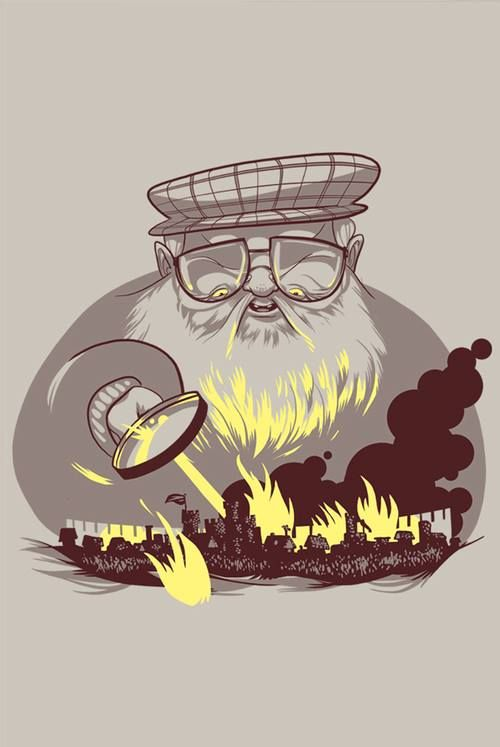

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
#!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
#!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [2]:
data_train = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

In [3]:
data_train.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data_train.shape

(1557, 25)

In [5]:
1557/2

778.5

In [6]:
data_train.isnull().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

Заполним пропуски в колонках dateOfBirth и age медианными значениями

In [7]:
data_train['age'] = data_train['age'].fillna(data_train['age'].median())
data_train['dateOfBirth'] = data_train['dateOfBirth'].fillna(data_train['age'].median())

Оставим колонки, которые содержат более 50% информации. (колонку culture уберем позже после преобразований)

In [8]:
data_train = data_train.drop(
    columns=[
        "name",
        "title",
        'house',
        # "dateOfBirth",
        "mother",
        "father",
        "heir",
        "spouse",
        "isAliveMother",
        "isAliveFather",
        "isAliveHeir",
        "isAliveSpouse",
        # "age",
    ],
    axis=1,
)

In [9]:
data_train.shape

(1557, 14)

In [10]:
data_train.head()

,male,culture,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,
1,1,NaN,24.0,0,0,0,0,0,0,0,24.0,11,0.605351,0
2,1,Rivermen,208.0,1,1,1,1,1,1,1,97.0,1,0.896321,1
3,1,NaN,24.0,0,0,0,1,0,0,1,24.0,0,0.267559,1
4,0,NaN,82.0,0,0,0,0,0,1,1,23.0,0,0.183946,0
5,0,Dornish,276.0,0,0,0,1,0,1,1,29.0,0,0.043478,1


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


Добавим признак isPopular

In [11]:
data_train["isPopular"] = [1 if x >= 0.5 else 0 for x in data_train["popularity"]]

Добавим признак boolDeadRelations

In [12]:
data_train['boolDeadRelations'] = [0 if x == 0 else 1 for x in data_train['numDeadRelations']]

Упростим признак culture

In [13]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [14]:
culture_dict = {value: k for k, v in cult.items() for value in v}

In [15]:
data_train['culture'] = data_train['culture'].replace(culture_dict)

Заполним пропуски в колонке culture значением 'other'

In [16]:
# data_train = data_train.drop(columns='culture', axis = 1)
data_train['culture'] = data_train['culture'].fillna('other')

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

Исключим категориальные признаки для анализа корреляции

In [18]:
numerical_data_train = data_train.drop(columns=['isAlive','culture'], axis=1)

Проверим: есть ли выбросы в данных.

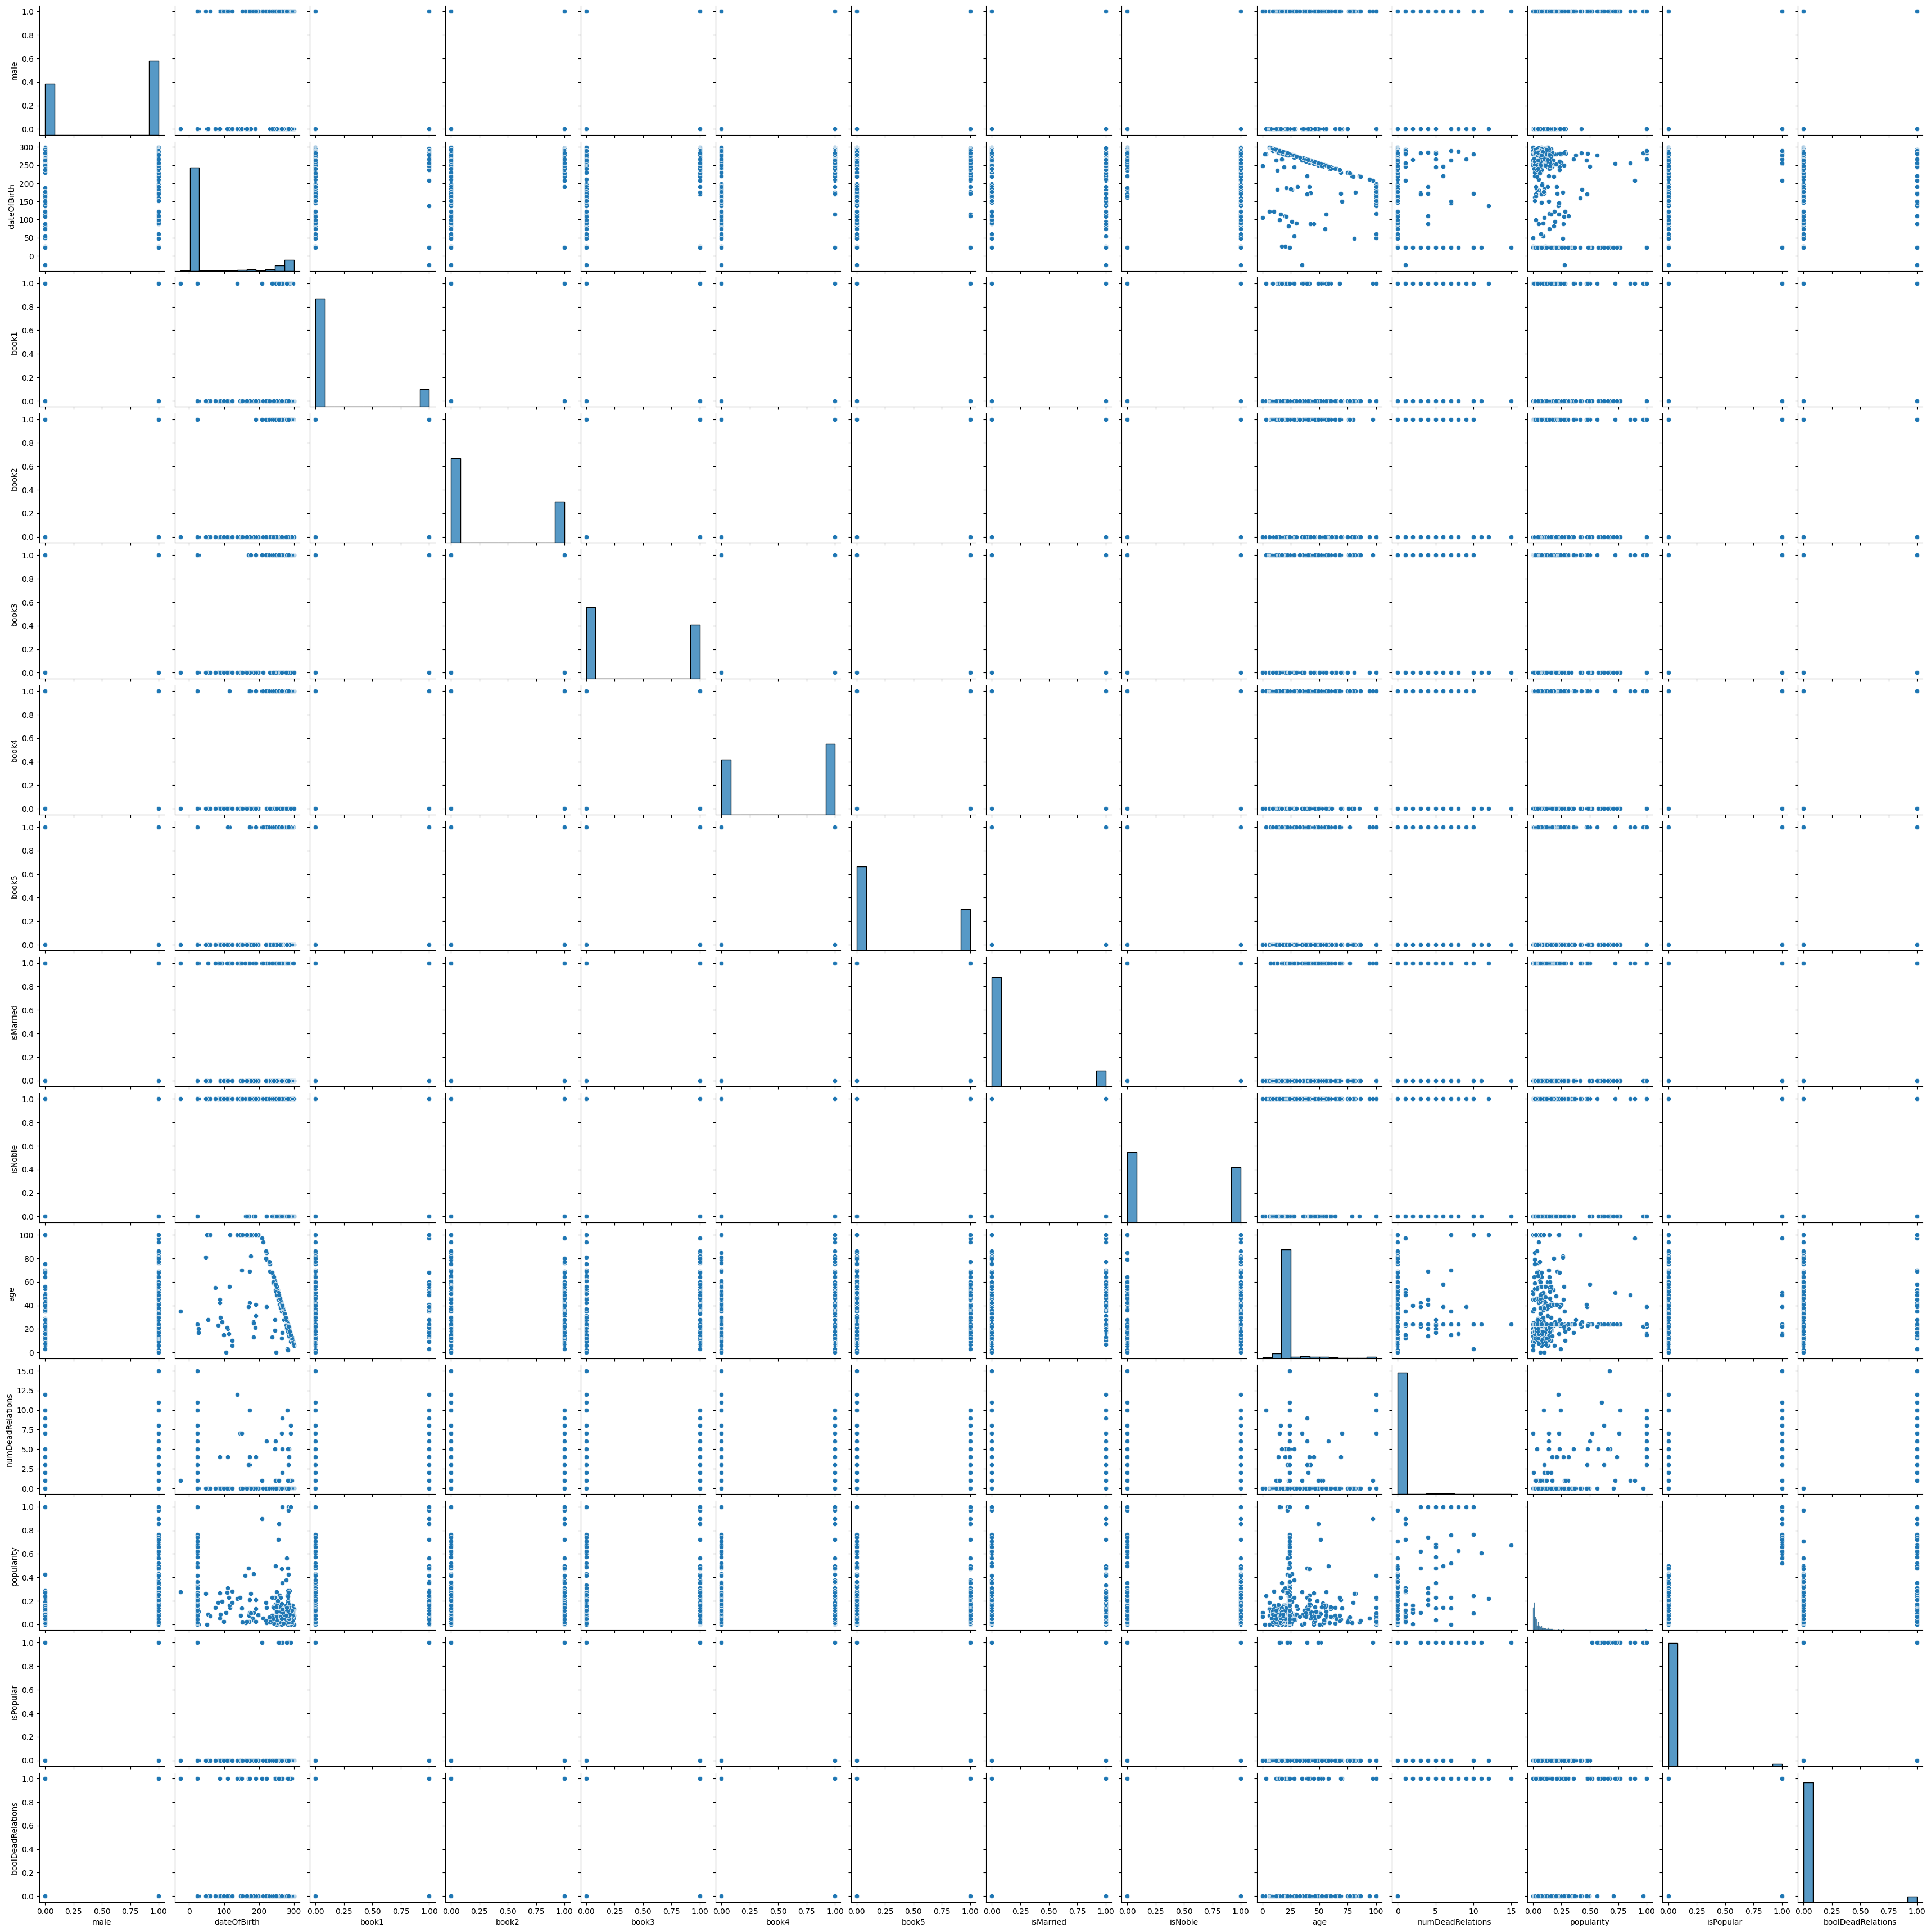

In [19]:
sns.pairplot(numerical_data_train)

Получим коэффициенты корреляции Пирсона и матрицу корреляций

In [20]:
numerical_data_train.corr(method='pearson')

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
male,1.000000,-0.022392,0.050526,0.024079,-0.008100,-0.101674,0.023022,-0.094385,0.133807,0.049588,0.027506,0.113342,0.080518,0.039540
dateOfBirth,-0.022392,1.000000,0.070416,0.291319,0.255668,0.207399,0.110032,0.141498,-0.062066,0.210147,0.115035,0.243091,0.060925,0.141598
book1,0.050526,0.070416,1.000000,0.278116,0.145458,-0.009461,0.180542,0.018072,0.041593,0.017256,0.082526,0.186818,0.074789,0.139291
book2,0.024079,0.291319,0.278116,1.000000,0.380968,0.102247,0.135720,0.153332,-0.033216,-0.017150,-0.004477,0.150816,0.001636,0.055850
book3,-0.008100,0.255668,0.145458,0.380968,1.000000,0.329153,0.226547,0.165407,0.007279,-0.030002,-0.025633,0.140993,-0.026356,0.032889
book4,-0.101674,0.207399,-0.009461,0.102247,0.329153,1.000000,0.302338,0.141145,0.047394,-0.064155,-0.072370,0.038810,-0.061401,-0.024038
book5,0.023022,0.110032,0.180542,0.135720,0.226547,0.302338,1.000000,0.065210,0.069338,0.010069,0.032609,0.089715,0.000907,0.094381
isMarried,-0.094385,0.141498,0.018072,0.153332,0.165407,0.141145,0.065210,1.000000,0.132037,0.180252,0.133491,0.241898,0.022525,0.197150
isNoble,0.133807,-0.062066,0.041593,-0.033216,0.007279,0.047394,0.069338,0.132037,1.000000,0.152249,0.024066,0.059233,-0.038279,0.054631
age,0.049588,0.210147,0.017256,-0.017150,-0.030002,-0.064155,0.010069,0.180252,0.152249,1.000000,0.125345,0.102125,0.025676,0.107943


<Axes: >

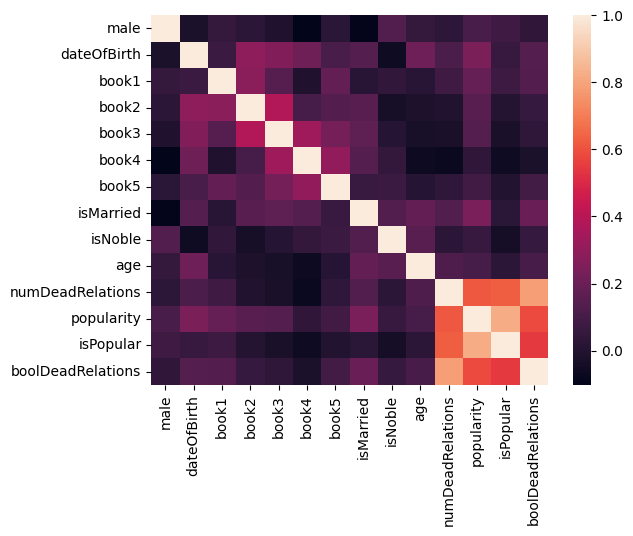

In [21]:
sns.heatmap(numerical_data_train.corr(method='pearson'))

Получим коэффициенты корреляции Спирмена и матрицу корреляций

In [22]:
numerical_data_train.corr(method='spearman')

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
male,1.000000,-0.021311,0.050526,0.024079,-0.008100,-0.101674,0.023022,-0.094385,0.133807,0.076416,0.039462,0.152415,0.080518,0.039540
dateOfBirth,-0.021311,1.000000,0.052343,0.259684,0.224650,0.168988,0.088278,0.167342,-0.030864,-0.102575,0.151865,0.382001,0.054775,0.151051
book1,0.050526,0.052343,1.000000,0.278116,0.145458,-0.009461,0.180542,0.018072,0.041593,0.020566,0.137971,0.188716,0.074789,0.139291
book2,0.024079,0.259684,0.278116,1.000000,0.380968,0.102247,0.135720,0.153332,-0.033216,-0.061910,0.053740,0.333599,0.001636,0.055850
book3,-0.008100,0.224650,0.145458,0.380968,1.000000,0.329153,0.226547,0.165407,0.007279,-0.088960,0.030738,0.378191,-0.026356,0.032889
book4,-0.101674,0.168988,-0.009461,0.102247,0.329153,1.000000,0.302338,0.141145,0.047394,-0.094006,-0.026312,0.292869,-0.061401,-0.024038
book5,0.023022,0.088278,0.180542,0.135720,0.226547,0.302338,1.000000,0.065210,0.069338,0.021156,0.092676,0.282492,0.000907,0.094381
isMarried,-0.094385,0.167342,0.018072,0.153332,0.165407,0.141145,0.065210,1.000000,0.132037,0.177767,0.196343,0.391896,0.022525,0.197150
isNoble,0.133807,-0.030864,0.041593,-0.033216,0.007279,0.047394,0.069338,0.132037,1.000000,0.189283,0.053826,0.139976,-0.038279,0.054631
age,0.076416,-0.102575,0.020566,-0.061910,-0.088960,-0.094006,0.021156,0.177767,0.189283,1.000000,0.054764,0.000569,-0.008172,0.054234


<Axes: >

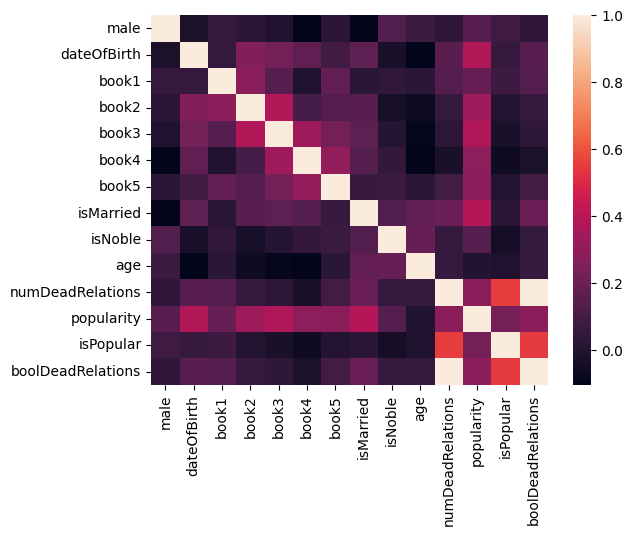

In [23]:
sns.heatmap(numerical_data_train.corr(method='spearman'))

Наибольшая корреляция наблюдается между популярностью и числом мертвых родственников. Затем идёт популярность и семейное положение героев.

In [24]:
new_numerical_data_train = numerical_data_train.drop(columns=['isPopular','boolDeadRelations'])

<Axes: >

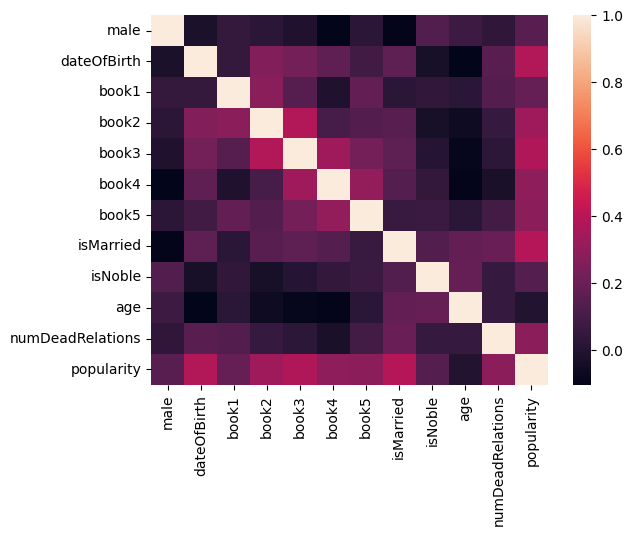

In [25]:
sns.heatmap(new_numerical_data_train.corr(method='spearman'))

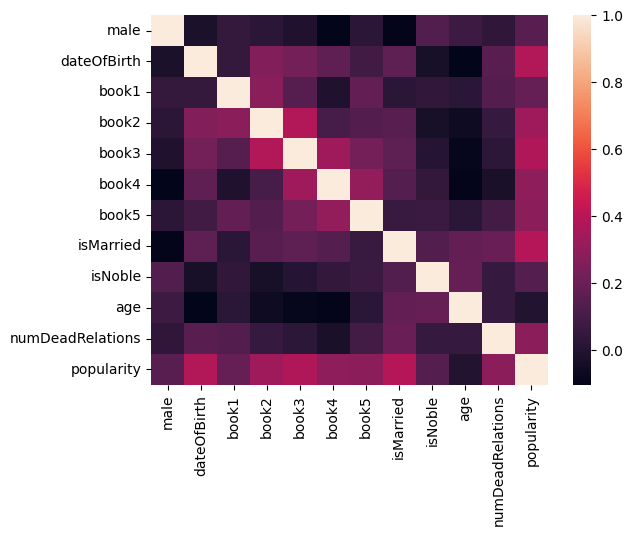

In [26]:
sns.heatmap(new_numerical_data_train.corr(method='spearman'));

Импортируем для оценки важности признаков RandomForest

In [27]:
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [33]:
X = new_numerical_data_train  # Убираем 'house' и целевую переменную
y = data_train['isAlive']

In [34]:
from scipy.stats import pearsonr, spearmanr, kendalltau

In [35]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

RandomForestClassifier(random_state=0)

In [36]:
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

In [37]:
print(forest_importances.sort_values(ascending=False))

popularity          0.436683
age                 0.092808
book4               0.087602
dateOfBirth         0.073995
isNoble             0.048008
book3               0.044571
book5               0.042687
numDeadRelations    0.039829
book2               0.038691
book1               0.037742
male                0.031571
isMarried           0.025815
dtype: float64


In [38]:
important_features = forest_importances[forest_importances > 0.01].index
important_features

Index(['male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity'],
      dtype='object')

In [ ]:
X_with_const = sm.add_constant(X)
ols = sm.OLS(y, X_with_const).fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                isAlive   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     25.57
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           5.08e-53
Time:                        20:35:53   Log-Likelihood:                -699.99
No. Observations:                1557   AIC:                             1426.
Df Residuals:                    1544   BIC:                             1496.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8846      0.030  

Таким образом, удаляем колонки:isPopular и boolDeadRelations

In [42]:
data_train.drop(columns=['isPopular','boolDeadRelations'], inplace = True)

In [43]:
data_train.head()

,male,culture,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,
1,1,other,24.0,0,0,0,0,0,0,0,24.0,11,0.605351,0
2,1,Rivermen,208.0,1,1,1,1,1,1,1,97.0,1,0.896321,1
3,1,other,24.0,0,0,0,1,0,0,1,24.0,0,0.267559,1
4,0,other,82.0,0,0,0,0,0,1,1,23.0,0,0.183946,0
5,0,Dornish,276.0,0,0,0,1,0,1,1,29.0,0,0.043478,1


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

Выделим уникальные значения целевой переменной ('isAlive')

In [44]:
target = data_train['isAlive']
target.unique()

array([0, 1])

Определим количество значений для каждого класса

In [45]:
target.value_counts()

isAlive
1    1212
0     345
Name: count, dtype: int64

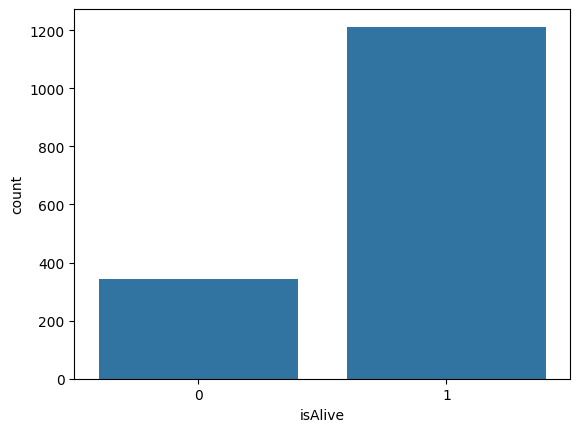

In [46]:
sns.countplot(x=target)
plt.show()

Проверим сбалансированность классов

In [47]:
balance = target.value_counts().max() / target.value_counts().min()
balance > 1.5

True

Таким образом, классы сбалансированны

In [48]:
data_train.head()

,male,culture,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,
1,1,other,24.0,0,0,0,0,0,0,0,24.0,11,0.605351,0
2,1,Rivermen,208.0,1,1,1,1,1,1,1,97.0,1,0.896321,1
3,1,other,24.0,0,0,0,1,0,0,1,24.0,0,0.267559,1
4,0,other,82.0,0,0,0,0,0,1,1,23.0,0,0.183946,0
5,0,Dornish,276.0,0,0,0,1,0,1,1,29.0,0,0.043478,1


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

Преобразуем колонки culture, house, age, numDeadRelations, dateOfBirth

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
stand_scaler = StandardScaler()
data_train['age'] = stand_scaler.fit_transform(data_train[['age']])

In [51]:
data_train['dateOfBirth'] = stand_scaler.fit_transform(data_train[['dateOfBirth']])

In [52]:
data_train['numDeadRelations'] = stand_scaler.fit_transform(data_train[['numDeadRelations']])

In [53]:
data_train = pd.get_dummies(data_train, columns=['culture'])

Корреляция признаков была представлена ранее

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Данный анализ был выполнен ранее

In [54]:
corr_matrix = data_train.corr()
target_corr = corr_matrix['isAlive'].sort_values(ascending=False)
print(target_corr)


isAlive             1.000000
book4               0.284014
culture_Braavosi    0.075621
culture_Ironborn    0.067003
culture_Dornish     0.041175
                      ...   
male               -0.148290
age                -0.179331
popularity         -0.194187
culture_Valyrian   -0.195454
numDeadRelations   -0.198876
Name: isAlive, Length: 62, dtype: float64


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [55]:
data_train.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,culture_Vale mountain clans,culture_Valemen,culture_Valyrian,culture_Westerlands,culture_Westerman,culture_Westermen,culture_Westeros,culture_Wildling,culture_ironborn,culture_other
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,-0.447116,0,0,0,0,0,0,0,-0.169265,...,False,False,False,False,False,False,False,False,False,True
2,1,1.606618,1,1,1,1,1,1,1,5.938317,...,False,False,False,False,False,False,False,False,False,False
3,1,-0.447116,0,0,0,1,0,0,1,-0.169265,...,False,False,False,False,False,False,False,False,False,True
4,0,0.200256,0,0,0,0,0,1,1,-0.252931,...,False,False,False,False,False,False,False,False,False,True
5,0,2.365606,0,0,0,1,0,1,1,0.249062,...,False,False,False,False,False,False,False,False,False,False


In [56]:
X = data_train.drop(columns='isAlive')
y = data_train['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [59]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [60]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [61]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Импортируем GridSearchCV для поиска наилучших данных для обучения модели

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid_logistic_regression = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'l1_ratio': [0.5],
}

In [64]:
# Шаг 1. создание модели
model_logistic_regression = LogisticRegression()

# Настройка GridSearchCV
grid_search_logistic_regression = GridSearchCV(
    estimator=model_logistic_regression,
    param_grid=param_grid_logistic_regression,
    cv=5,
    scoring="accuracy",
    verbose=1,
)

# Шаг 2. обучение модели
grid_search_logistic_regression.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search_logistic_regression.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarni

Лучшие параметры: {'C': 1.0, 'l1_ratio': 0.5, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/skle

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [65]:
# AdaBoostClassifier
param_grid_adaboostclassifier = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}

model_adaboostclassifier = AdaBoostClassifier()

# Настройка GridSearchCV
grid_search_adaboostclassifier = GridSearchCV(
    estimator=model_adaboostclassifier,
    param_grid=param_grid_adaboostclassifier,
    cv=5,
    scoring="accuracy",
    verbose=1,
)

# Шаг 2. обучение модели
grid_search_adaboostclassifier.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search_adaboostclassifier.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecat

Лучшие параметры: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100}


/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [66]:
# RandomForestClassifier
param_grid_randomforestclassifier = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

model_randomforestclassifier = RandomForestClassifier()

# Настройка GridSearchCV
grid_search_randomforestclassifier = GridSearchCV(
    estimator=model_randomforestclassifier,
    param_grid=param_grid_randomforestclassifier,
    cv=5,
    scoring="accuracy",
    verbose=1,
)

# Шаг 2. обучение модели
grid_search_randomforestclassifier.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search_randomforestclassifier.best_params_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Лучшие параметры: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/sklearn/base.py",

In [67]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [68]:
# GaussianProcessClassifier
param_grid_gaussianprocessclassifier = {
    'optimizer': ['fmin_l_bfgs_b', None],
    'n_restarts_optimizer': [0, 5],
}

model_gaussianprocessclassifier = GaussianProcessClassifier()

# Настройка GridSearchCV
grid_search_gaussianprocessclassifier = GridSearchCV(
    estimator=model_gaussianprocessclassifier,
    param_grid=param_grid_gaussianprocessclassifier,
    cv=5,
    scoring="accuracy",
    verbose=1,
)

# Шаг 2. обучение модели
grid_search_gaussianprocessclassifier.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search_gaussianprocessclassifier.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Лучшие параметры: {'n_restarts_optimizer': 0, 'optimizer': 'fmin_l_bfgs_b'}


In [69]:
# GaussianNB
param_grid_gaussiannb = {
    'priors': [None, [0.5, 0.5]],
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
}

model_gaussiannb = GaussianNB()

# Настройка GridSearchCV
grid_search_gaussiannb = GridSearchCV(
    estimator=model_gaussiannb,
    param_grid=param_grid_gaussiannb,
    cv=5,
    scoring="accuracy",
    verbose=1,
)

# Шаг 2. обучение модели
grid_search_gaussiannb.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search_gaussiannb.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Лучшие параметры: {'priors': None, 'var_smoothing': 1e-06}


In [70]:
# KNeighborsClassifier
param_grid_kneighborsclassifier = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'metric': ['euclidean', 'manhattan'],
    'p': [1, 2],
}

model_kneighborsclassifier = KNeighborsClassifier()

# Настройка GridSearchCV
grid_search_kneighborsclassifier = GridSearchCV(
    estimator=model_kneighborsclassifier,
    param_grid=param_grid_kneighborsclassifier,
    cv=5,
    scoring="accuracy",
    verbose=1,
)

# Шаг 2. обучение модели
grid_search_kneighborsclassifier.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search_kneighborsclassifier.best_params_)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


Лучшие параметры: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


/home/userr/projects/dls-2024/hw4_1/.venv/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [71]:
# SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.1, 1.0],
}

model_svc = SVC()

# Настройка GridSearchCV
grid_search_svc = GridSearchCV(
    estimator=model_svc,
    param_grid=param_grid_svc,
    cv=5,
    scoring="accuracy",
    verbose=1,
)

# Шаг 2. обучение модели
grid_search_svc.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search_svc.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Лучшие параметры: {'C': 100, 'coef0': 1.0, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}


In [72]:
# DecisionTreeClassifier
param_grid_decisiontreeclassifier = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None, 'sqrt', 'log2'],  
    'class_weight': [None, 'balanced']  
}

model_decisiontreeclassifier = DecisionTreeClassifier()

# Настройка GridSearchCV
grid_search_decisiontreeclassifier = GridSearchCV(
    estimator=model_decisiontreeclassifier,
    param_grid=param_grid_decisiontreeclassifier,
    cv=5,
    scoring="accuracy",
    verbose=1,
)

# Шаг 2. обучение модели
grid_search_decisiontreeclassifier.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search_decisiontreeclassifier.best_params_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Лучшие параметры: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [73]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [74]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7756


In [75]:
# Шаг 3. Предсказание на тестовых данных
best_model_logistic_regression = grid_search_logistic_regression.best_estimator_
y_pred_logistic_regression = best_model_logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print("Точность на тестовой выборке для логистической регрессии:", accuracy_logistic_regression)

Точность на тестовой выборке для логистической регрессии: 0.7788461538461539


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [76]:
# Шаг 3. Предсказание на тестовых данных
best_model_adaboostclassifier = grid_search_adaboostclassifier.best_estimator_
y_pred_adaboostclassifier = best_model_adaboostclassifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_adaboostclassifier = accuracy_score(y_test, y_pred_adaboostclassifier)
print("Точность на тестовой выборке для AdaBoostClassifier:", accuracy_adaboostclassifier)

Точность на тестовой выборке для AdaBoostClassifier: 0.8205128205128205


In [77]:
# Шаг 3. Предсказание на тестовых данных
best_model_randomforestclassifier = grid_search_randomforestclassifier.best_estimator_
y_pred_randomforestclassifier = best_model_randomforestclassifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_randomforestclassifier = accuracy_score(y_test, y_pred_randomforestclassifier)
print("Точность на тестовой выборке для RandomForestClassifier:", accuracy_randomforestclassifier)

Точность на тестовой выборке для RandomForestClassifier: 0.8044871794871795


In [78]:
# Шаг 3. Предсказание на тестовых данных
best_model_gaussianprocessclassifier = grid_search_gaussianprocessclassifier.best_estimator_
y_pred_gaussianprocessclassifier = best_model_gaussianprocessclassifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_gaussianprocessclassifier = accuracy_score(y_test, y_pred_gaussianprocessclassifier)
print("Точность на тестовой выборке для GaussianProcessClassifier:", accuracy_gaussianprocessclassifier)

Точность на тестовой выборке для GaussianProcessClassifier: 0.7852564102564102


In [79]:
# Шаг 3. Предсказание на тестовых данных
best_model_gaussiannb = grid_search_gaussiannb.best_estimator_
y_pred_gaussiannb = best_model_gaussiannb.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_gaussiannb = accuracy_score(y_test, y_pred_gaussiannb)
print("Точность на тестовой выборке для GaussianNB:", accuracy_gaussiannb)

Точность на тестовой выборке для GaussianNB: 0.3173076923076923


In [80]:
# Шаг 3. Предсказание на тестовых данных
best_model_kneighborsclassifier = grid_search_kneighborsclassifier.best_estimator_
y_pred_kneighborsclassifier = best_model_kneighborsclassifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_kneighborsclassifier = accuracy_score(y_test, y_pred_kneighborsclassifier)
print("Точность на тестовой выборке для KNeighborsClassifier:", accuracy_kneighborsclassifier)

Точность на тестовой выборке для KNeighborsClassifier: 0.7948717948717948


In [81]:
# Шаг 3. Предсказание на тестовых данных
best_model_svc = grid_search_svc.best_estimator_
y_pred_svc = best_model_svc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Точность на тестовой выборке для SVC:", accuracy_svc)

Точность на тестовой выборке для SVC: 0.8044871794871795


In [82]:
# Шаг 3. Предсказание на тестовых данных
best_model_decisiontreeclassifier = grid_search_decisiontreeclassifier.best_estimator_
y_pred_decisiontreeclassifier = best_model_decisiontreeclassifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_decisiontreeclassifier = accuracy_score(y_test, y_pred_decisiontreeclassifier)
print("Точность на тестовой выборке для DecisionTreeClassifier:", accuracy_decisiontreeclassifier)

Точность на тестовой выборке для DecisionTreeClassifier: 0.8076923076923077


Выберите лучшую модель.

Таким образом, лучшей моделью оказалась RandomForestClassifier с параметрами:
{'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


### Оформим pipeline для тестового датасета

In [104]:
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

In [105]:
data_test

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


In [106]:
data_test['age'] = data_test['age'].fillna(data_test['age'].median())
data_test['dateOfBirth'] = data_test['dateOfBirth'].fillna(data_test['age'].median())
data_test['age'] = stand_scaler.fit_transform(data_test[['age']])
data_test['dateOfBirth'] = stand_scaler.fit_transform(data_test[['dateOfBirth']])
data_test['numDeadRelations'] = stand_scaler.fit_transform(data_test[['numDeadRelations']])
data_test['culture'] = data_test['culture'].replace(culture_dict)
data_test['culture'] = data_test['culture'].fillna('other')
data_test = data_test.drop(
    columns=[
        "name",
        "title",
        'house',
        # "dateOfBirth",
        "mother",
        "father",
        "heir",
        "spouse",
        "isAliveMother",
        "isAliveFather",
        "isAliveHeir",
        "isAliveSpouse",
        # "age",
    ],
    axis=1,
)
data_test = pd.get_dummies(data_test, columns=['culture'])

In [107]:
data_test.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,culture_Vale mountain clans,culture_Valemen,culture_Valyrian,culture_Westerlands,culture_Westerman,culture_Westermen,culture_Westeros,culture_Wildling,culture_Wildlings,culture_other
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,-0.069902,0,0,0,0,1,0,0,0.074999,...,False,False,False,False,False,False,False,False,False,True
1559,0,-0.075915,0,1,1,1,1,0,0,0.071700,...,False,False,False,False,False,False,False,False,False,False
1560,0,-0.075915,0,0,1,1,0,0,0,0.071700,...,False,False,False,False,False,False,False,False,False,True
1561,1,-0.075915,1,1,1,1,1,0,1,0.071700,...,False,False,False,False,False,False,False,False,False,True
1562,1,-0.064762,1,1,1,1,1,1,0,0.071991,...,False,False,False,False,False,False,False,False,False,False


### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [83]:
# !gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

/bin/bash: line 1: gdown: command not found


In [85]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [86]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [112]:
X_test_aligned = data_test.reindex(columns=X_train.columns, fill_value=0)

In [113]:
X_test_aligned

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,culture_Vale mountain clans,culture_Valemen,culture_Valyrian,culture_Westerlands,culture_Westerman,culture_Westermen,culture_Westeros,culture_Wildling,culture_ironborn,culture_other
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,-0.069902,0,0,0,0,1,0,0,0.074999,...,False,False,False,False,False,False,False,False,0,True
1559,0,-0.075915,0,1,1,1,1,0,0,0.071700,...,False,False,False,False,False,False,False,False,0,False
1560,0,-0.075915,0,0,1,1,0,0,0,0.071700,...,False,False,False,False,False,False,False,False,0,True
1561,1,-0.075915,1,1,1,1,1,0,1,0.071700,...,False,False,False,False,False,False,False,False,0,True
1562,1,-0.064762,1,1,1,1,1,1,0,0.071991,...,False,False,False,False,False,False,False,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,-0.075915,1,1,1,1,1,0,0,0.071700,...,False,False,False,False,False,False,True,False,0,False
1943,1,-0.075915,0,1,0,1,1,0,0,0.071700,...,False,False,False,False,False,False,False,False,0,True
1944,1,-0.075915,1,1,1,1,1,0,0,0.071700,...,False,False,False,False,False,False,False,False,0,True


In [144]:
y_test_pred = grid_search_randomforestclassifier.predict(X_test_aligned)

In [145]:
print("Размеры y_test_pred:", y_test_pred.shape)
print("Размеры submission:", submission.shape)

Размеры y_test_pred: (389,)
Размеры submission: (389, 1)


In [146]:
submission['isAlive'] = y_test_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [147]:
submission.to_csv("new_submission.csv", index=False)